# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [ ]:
%matplotlib inline 

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import * 

# Visa interface for the M8190A instrument:

In [2]:
M8190A = VisaR(AWG_Settings2,60000)

In [3]:
Initialization(M8190A,AWG_Settings2)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output Voltage set to 3.00000000000000E-01deciVolts


In [4]:
M8190A.write('*RST')

5

In [5]:
M8190A.query('FREQ:RAST?')

'5.00000000000000E+08'

In [ ]:
M8190A.query('SYST:ERR?')

In [6]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [9]:
DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader(PScheme,PScheme2,5,15,7500000,2,4,M8190A,AWG_Settings2,1,15)

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
57.86038064956665


In [6]:
M8190A.write('ABOR')

5

In [11]:
tic = time.time()

LocA,DFA,timm = Swep_Iteration_csv(Pulses_List,5,15,7500000,3,5,AWG_Settings2,1)
LocB,DFB,timm = Swep_Iteration_csv(Pulses_List2,5,15,7500000,3,5,AWG_Settings2,0)

toc = time.time()
print(toc - tic)

306.24950313568115


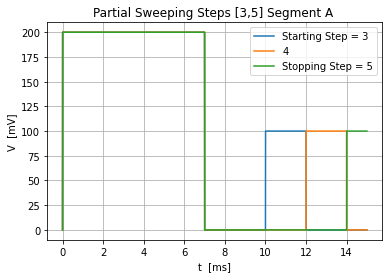

In [12]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timm,DFA['SegmentA_7500000_3'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Starting Step = 3')
plt.plot(timm,DFA['SegmentA_7500000_4'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= '4')
plt.plot(timm,DFA['SegmentA_7500000_5'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Stopping Step = 5')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [3,5] Segment A ')

ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

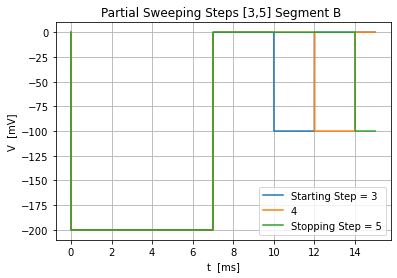

In [14]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timm,DFB['SegmentB_7500000_3'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Starting Step = 3')
plt.plot(timm,DFB['SegmentB_7500000_4'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= '4')
plt.plot(timm,DFB['SegmentB_7500000_5'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Stopping Step = 5')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [3,5] Segment B ')

ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [18]:
Sequence_Loader0(M8190A,LocA,LocB,1,15)


Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
57.71664118766785


In [ ]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(tom,obo2[0],label= 'Starting Step = 5')
plt.plot(tom,obo2[1],label= '6')
plt.plot(tom,obo2[2],label= '7')
plt.plot(tom,obo2[3],label= '8')
plt.plot(tom,obo2[4],label= '9')
plt.plot(tom,obo2[5],label= 'Stopping Step =10')
#plt.plot(tom,obo[10],label= '10')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title(' Partial Sweeping Steps [5,10]')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

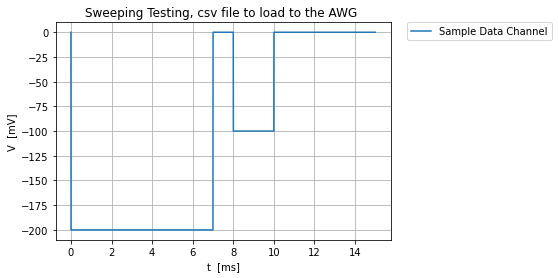

In [16]:

fig,ax= plt.subplots()

ax.grid(True)


plt.plot(timm,DFB['SegmentB_650000_4'].iloc[:,0]*300,label= 'Sample Data Channel')
#plt.plot(timm,DFB['SegmentB_650000_4'].iloc[:,0],label= 'Marker Channel',color= 'purple')
ax.set_xlabel('t  [ms]')
ax.set_ylabel('V  [mV]')
ax.set_title('Sweeping Testing, csv file to load to the AWG ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#fig.savefig('Pulse_reading_15ms_500MHz',optimize=True,bbox_inches='tight')

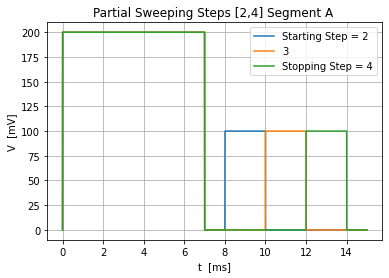

In [21]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timm,DFA['SegmentA_650000_2'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Starting Step = 2')
plt.plot(timm,DFA['SegmentA_650000_3'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= '3')
plt.plot(timm,DFA['SegmentA_650000_4'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Stopping Step = 4')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [2,4] Segment A ')

ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

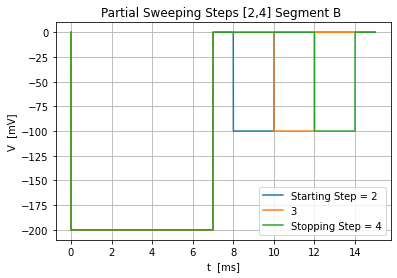

In [19]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timm,DFB['SegmentB_650000_2'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Starting Step = 2')
plt.plot(timm,DFB['SegmentB_650000_3'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= '3')
plt.plot(timm,DFB['SegmentB_650000_4'].iloc[:,0]*AWG_Settings2['Voltage Amplitude'],label= 'Stopping Step = 4')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Partial Sweeping Steps [2,4] Segment B ')

ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [ ]:
M8190A.write('*RST')